In [1]:
import pandas as pddata
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [3]:
data = pd.read_csv('salary_data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


# Data Cleaning

In [7]:
#Renaming the column

data = data.rename({'YearsExperience' : 'Experience'}, axis=1)

In [8]:
data.tail()

,Experience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


# EDA and Data visualization

C:\Users\tambe\AppData\Local\Temp\ipykernel_18896\3440899688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Experience'])


<Axes: xlabel='Experience', ylabel='Density'>

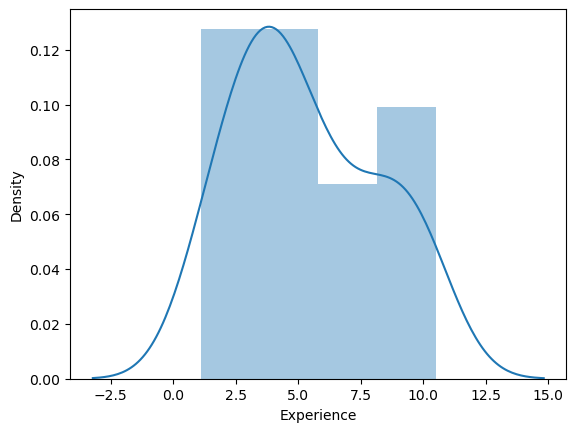

In [9]:
sns.distplot(data['Experience'])

C:\Users\tambe\AppData\Local\Temp\ipykernel_18896\580572721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

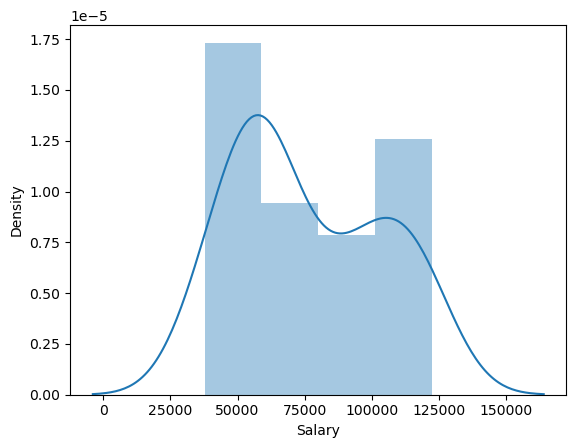

In [10]:
sns.distplot(data['Salary'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  30 non-null     float64
 1   Salary      30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


# Correlation analysis

In [12]:
data.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Experience', ylabel='Salary'>

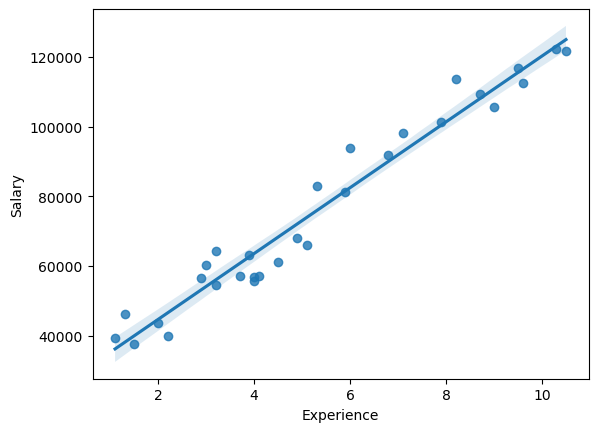

In [13]:
sns.regplot(x=data['Experience'],y=data['Salary'])

# Model Building

In [14]:
import statsmodels.formula.api as smf

model = smf.ols('Salary~Experience',data=data).fit()

# Model Testing

In [16]:
#Extracting the coefficients

model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [17]:
model.tvalues , model.pvalues

(Intercept     11.346940
 Experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 Experience    1.143068e-20
 dtype: float64)

In [19]:
#R-squared value defines the accuracy of model
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [20]:
#Manual prediction of salary hike for 2 years of experience

data_new = (25792.20) +(9449.96) * 2
data_new

44692.119999999995

In [28]:
#Automatic prediction of salary hike for 4 and 5 years of experience

data_pred = pd.Series([3,5])
data_pred

0    3
1    5
dtype: int64

In [29]:
data_pred = pd.DataFrame(data_pred,columns=['Experience'])
data_pred

,Experience
0,3
1,5


In [30]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [31]:
data.head(20)

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0
